# 1) Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

# 2) Loading Dataset

In [2]:
iot_data = pd.read_csv('iot_telemetry_data.csv')
iot_data

,ts,device,co,humidity,light,lpg,motion,smoke,temp
0,1.590000e+09,b8:27:eb:bf:9d:51,0.004956,51.000000,False,0.007651,False,0.020411,22.700000
1,1.590000e+09,00:0f:00:70:91:0a,0.002840,76.000000,False,0.005114,False,0.013275,19.700001
2,1.590000e+09,b8:27:eb:bf:9d:51,0.004976,50.900000,False,0.007673,False,0.020475,22.600000
3,1.590000e+09,1c:bf:ce:15:ec:4d,0.004403,76.800003,True,0.007023,False,0.018628,27.000000
4,1.590000e+09,b8:27:eb:bf:9d:51,0.004967,50.900000,False,0.007664,False,0.020448,22.600000
...,...,...,...,...,...,...,...,...,...
405179,1.600000e+09,00:0f:00:70:91:0a,0.003745,75.300003,False,0.006247,False,0.016437,19.200001
405180,1.600000e+09,b8:27:eb:bf:9d:51,0.005882,48.500000,False,0.008660,False,0.023301,22.200000
405181,1.600000e+09,1c:bf:ce:15:ec:4d,0.004540,75.699997,True,0.007181,False,0.019076,26.600000
405182,1.600000e+09,00:0f:00:70:91:0a,0.003745,75.300003,False,0.006247,False,0.016437,19.200001


In [3]:
iot_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405184 entries, 0 to 405183
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   ts        405184 non-null  float64
 1   device    405184 non-null  object 
 2   co        405184 non-null  float64
 3   humidity  405184 non-null  float64
 4   light     405184 non-null  bool   
 5   lpg       405184 non-null  float64
 6   motion    405184 non-null  bool   
 7   smoke     405184 non-null  float64
 8   temp      405184 non-null  float64
dtypes: bool(2), float64(6), object(1)
memory usage: 22.4+ MB


# 3) Preprocessing of Data

In [4]:
iot_data['time_stamp'] = pd.to_datetime(iot_data['ts'], unit='s')
#since in the Time column, a date isn’t specified and hence Pandas will put Some date automatically in that case.
iot_data.drop(columns=['ts'], inplace=True) 
print(iot_data.head())

              device        co   humidity  light       lpg  motion     smoke  \
0  b8:27:eb:bf:9d:51  0.004956  51.000000  False  0.007651   False  0.020411   
1  00:0f:00:70:91:0a  0.002840  76.000000  False  0.005114   False  0.013275   
2  b8:27:eb:bf:9d:51  0.004976  50.900000  False  0.007673   False  0.020475   
3  1c:bf:ce:15:ec:4d  0.004403  76.800003   True  0.007023   False  0.018628   
4  b8:27:eb:bf:9d:51  0.004967  50.900000  False  0.007664   False  0.020448   

        temp          time_stamp  
0  22.700000 2020-05-20 18:40:00  
1  19.700001 2020-05-20 18:40:00  
2  22.600000 2020-05-20 18:40:00  
3  27.000000 2020-05-20 18:40:00  
4  22.600000 2020-05-20 18:40:00  


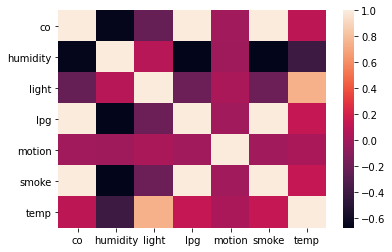

In [5]:
sns.heatmap(iot_data.corr()) 

In [6]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder=LabelEncoder()
Devices = labelencoder.fit_transform(iot_data['device'])
Light = labelencoder.fit_transform(iot_data['light'])
Motion = labelencoder.fit_transform(iot_data['motion'])

onehotencoder=OneHotEncoder()

In [7]:
iot_data['device'] = Devices
iot_data['light'] = Light
iot_data['motion'] = Motion
iot_data

,device,co,humidity,light,lpg,motion,smoke,temp,time_stamp
0,2,0.004956,51.000000,0,0.007651,0,0.020411,22.700000,2020-05-20 18:40:00
1,0,0.002840,76.000000,0,0.005114,0,0.013275,19.700001,2020-05-20 18:40:00
2,2,0.004976,50.900000,0,0.007673,0,0.020475,22.600000,2020-05-20 18:40:00
3,1,0.004403,76.800003,1,0.007023,0,0.018628,27.000000,2020-05-20 18:40:00
4,2,0.004967,50.900000,0,0.007664,0,0.020448,22.600000,2020-05-20 18:40:00
...,...,...,...,...,...,...,...,...,...
405179,0,0.003745,75.300003,0,0.006247,0,0.016437,19.200001,2020-09-13 12:26:40
405180,2,0.005882,48.500000,0,0.008660,0,0.023301,22.200000,2020-09-13 12:26:40
405181,1,0.004540,75.699997,1,0.007181,0,0.019076,26.600000,2020-09-13 12:26:40
405182,0,0.003745,75.300003,0,0.006247,0,0.016437,19.200001,2020-09-13 12:26:40


In [8]:
iot_data_df = pd.DataFrame(iot_data)
iot_data_df.head()

,device,co,humidity,light,lpg,motion,smoke,temp,time_stamp
0,2,0.004956,51.000000,0,0.007651,0,0.020411,22.700000,2020-05-20 18:40:00
1,0,0.002840,76.000000,0,0.005114,0,0.013275,19.700001,2020-05-20 18:40:00
2,2,0.004976,50.900000,0,0.007673,0,0.020475,22.600000,2020-05-20 18:40:00
3,1,0.004403,76.800003,1,0.007023,0,0.018628,27.000000,2020-05-20 18:40:00
4,2,0.004967,50.900000,0,0.007664,0,0.020448,22.600000,2020-05-20 18:40:00


In [9]:
iot_data_df.isnull().sum()

device        0
co            0
humidity      0
light         0
lpg           0
motion        0
smoke         0
temp          0
time_stamp    0
dtype: int64

In [10]:
#converting the given temperature in  Fahrenheit to degree Celsius
iot_data_df['temp'] = (iot_data_df['temp'] * 1.8) + 32
iot_data_df

,device,co,humidity,light,lpg,motion,smoke,temp,time_stamp
0,2,0.004956,51.000000,0,0.007651,0,0.020411,72.860000,2020-05-20 18:40:00
1,0,0.002840,76.000000,0,0.005114,0,0.013275,67.460001,2020-05-20 18:40:00
2,2,0.004976,50.900000,0,0.007673,0,0.020475,72.680000,2020-05-20 18:40:00
3,1,0.004403,76.800003,1,0.007023,0,0.018628,80.600000,2020-05-20 18:40:00
4,2,0.004967,50.900000,0,0.007664,0,0.020448,72.680000,2020-05-20 18:40:00
...,...,...,...,...,...,...,...,...,...
405179,0,0.003745,75.300003,0,0.006247,0,0.016437,66.560001,2020-09-13 12:26:40
405180,2,0.005882,48.500000,0,0.008660,0,0.023301,71.960000,2020-09-13 12:26:40
405181,1,0.004540,75.699997,1,0.007181,0,0.019076,79.880001,2020-09-13 12:26:40
405182,0,0.003745,75.300003,0,0.006247,0,0.016437,66.560001,2020-09-13 12:26:40


# 4) Visualization

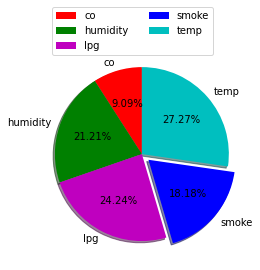

In [11]:
affect=['co', 'humidity', 'lpg', 'smoke', 'temp']
slice=[3,7,8,6,9]
color=['r', 'g', 'm', 'b', 'c']

plt.pie(slice, labels=affect, colors=color, startangle=90,shadow=True, 
       explode=(0,0,0,0.1,0), autopct='%1.2f%%')
plt.legend(bbox_to_anchor =(0.85, 1.20), ncol = 2) 
plt.show()

Text(0.5, 0.98, 'Environmental Sensor IoT')

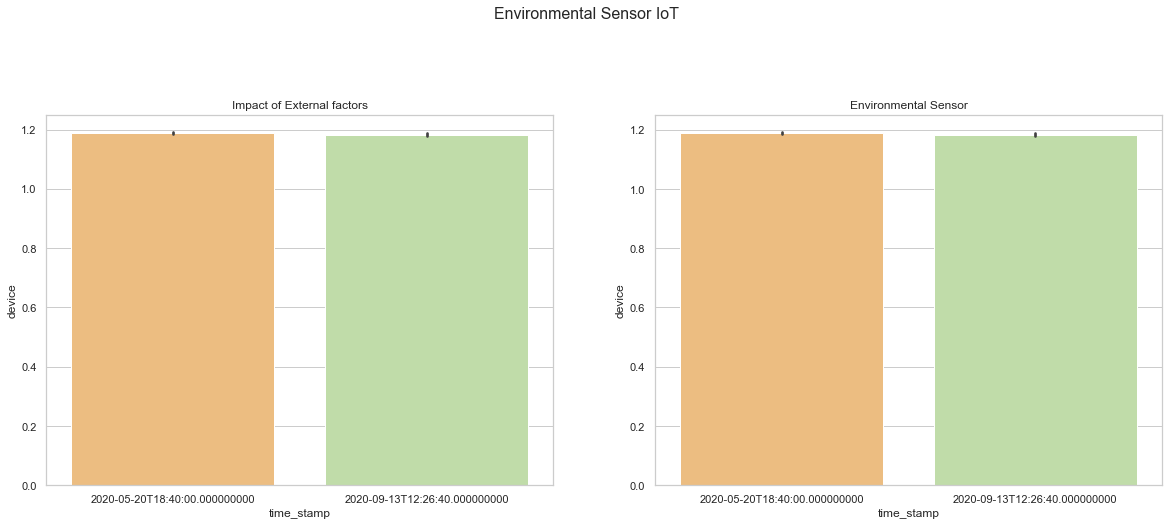

In [12]:
from matplotlib.gridspec import GridSpec
sns.set(style="whitegrid")


plt.figure(2, figsize=(20,15))
the_grid = GridSpec(2, 2)

plt.subplot(the_grid[0, 1],  title='Environmental Sensor')
sns.barplot(y='device',x='time_stamp', data=iot_data_df, palette='Spectral')
plt.subplot(the_grid[0, 0], title='Impact of External factors')

sns.barplot(y='device',x='time_stamp', data=iot_data_df, palette='Spectral')

plt.suptitle('Environmental Sensor IoT', fontsize=16)

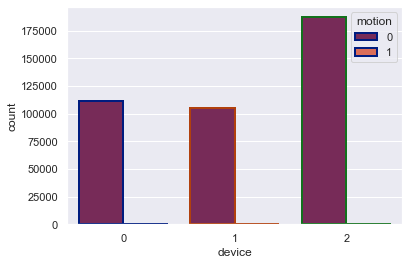

In [13]:
sns.set_style('darkgrid')
sns.countplot('device', hue='motion',palette="rocket", edgecolor=sns.color_palette("dark", 3),linewidth=2, data=iot_data_df)

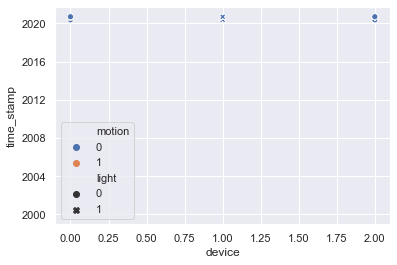

In [14]:
sns.scatterplot('device', 'time_stamp', hue= 'motion', style='light' , data=iot_data_df)

In [18]:
iot_data_df.drop('time_stamp', axis=1, inplace=True)
iot_data_df.head()

,device,co,humidity,light,lpg,motion,smoke,temp
0,2,0.004956,51.000000,0,0.007651,0,0.020411,72.860000
1,0,0.002840,76.000000,0,0.005114,0,0.013275,67.460001
2,2,0.004976,50.900000,0,0.007673,0,0.020475,72.680000
3,1,0.004403,76.800003,1,0.007023,0,0.018628,80.600000
4,2,0.004967,50.900000,0,0.007664,0,0.020448,72.680000


# 5) Spliting Dataset into Train & Test

In [26]:
x = iot_data_df.drop('motion', axis= 1)
y = iot_data_df['motion'].values
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [27]:
x

,device,co,humidity,light,lpg,smoke,temp
0,2,0.004956,51.000000,0,0.007651,0.020411,72.860000
1,0,0.002840,76.000000,0,0.005114,0.013275,67.460001
2,2,0.004976,50.900000,0,0.007673,0.020475,72.680000
3,1,0.004403,76.800003,1,0.007023,0.018628,80.600000
4,2,0.004967,50.900000,0,0.007664,0.020448,72.680000
...,...,...,...,...,...,...,...
405179,0,0.003745,75.300003,0,0.006247,0.016437,66.560001
405180,2,0.005882,48.500000,0,0.008660,0.023301,71.960000
405181,1,0.004540,75.699997,1,0.007181,0.019076,79.880001
405182,0,0.003745,75.300003,0,0.006247,0.016437,66.560001


In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.05, random_state=0)

# 6) Training and Predicting

In [29]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(X_train, y_train)

LogisticRegression()

In [30]:
prediction = reg.predict(X_test)
prediction

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

Text(0.5, 12.5, 'Predicted label')

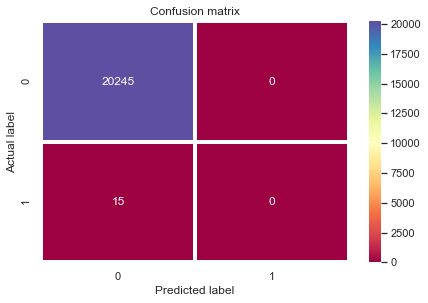

In [31]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
cnf_matrix = metrics.confusion_matrix(y_test, prediction)
#cnf_matrix
sns.heatmap(cnf_matrix, annot=True, cmap="Spectral" ,fmt='g', linewidth = 3)
plt.tight_layout()
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [32]:
print("Accuracy:",metrics.accuracy_score(y_test, prediction))
print("Precision:",metrics.precision_score(y_test, prediction))
print("Recall:",metrics.recall_score(y_test, prediction))

Accuracy: 0.9992596248766041
Precision: 0.0
Recall: 0.0


c:\users\shree\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Since motion had approx True (482 values = 0% ) value which is True in the Motion column rest False (405k = 100%) , so the machine will not predict the right accuracy.

# Accuracy is approx 100% which means machine is overfitted.

# Precision = 0,  which means that the machine could not find relevant data  with true values.

# Recall = 0, means that all relavant data couldn't be retrieved by the search